# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
import pandas as pd
import numpy as np

try:
    from urllib import urlretrieve as urlretrieve
except ImportError:
    from urllib.request import urlretrieve as urlretrieve
import os
import matplotlib.pylab as pl
import matplotlib.colors
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [19]:
url = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
urllib.request.urlretrieve(url,"file.gz")

('file.gz', <http.client.HTTPMessage at 0x7fea3d6455c0>)

In [56]:
url = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"
urllib.request.urlretrieve(url,"file2.gz")

('file2.gz', <http.client.HTTPMessage at 0x7fea3ce1e5c0>)

In [57]:
!unzip -d $PUIDATA file2.gz

Archive:  file2.gz
  inflating: /nfshome/ks5063/PUIdata/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: /nfshome/ks5063/PUIdata/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: /nfshome/ks5063/PUIdata/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  


In [20]:
!unzip -d $PUIDATA file.gz

Archive:  file.gz
  inflating: /nfshome/ks5063/PUIdata/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: /nfshome/ks5063/PUIdata/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: /nfshome/ks5063/PUIdata/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  


In [3]:
df_1 = pd.read_csv(os.environ["PUIDATA"] +"/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv",skiprows=4)
df_1 = df_1.loc[:,['Country Name','2012']]
df_1.rename(columns={'2012':'pop'},inplace=True)
df_1.head()

Country Name         pop
0        Aruba    102577.0
1  Afghanistan  30696958.0
2       Angola  25096150.0
3      Albania   2900401.0
4      Andorra     82431.0

In [4]:
df_2 = pd.read_csv(os.environ["PUIDATA"] +"/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv",skiprows=4)
df_2 = df_2.loc[:,['Country Name','2012']]
df_2.rename(columns={'2012':'gdp'},inplace=True)
df_2.head()

Country Name           gdp
0        Aruba           NaN
1  Afghanistan  2.053654e+10
2       Angola  1.139232e+11
3      Albania  1.231978e+10
4      Andorra  3.164615e+09

In [5]:
ms1 = pd.read_csv("https://s3.us-east-2.amazonaws.com/pui2018hw7/data-pvLFI.csv")
ms1.rename(columns={"Guns per 100 inhabitants":"Guns/100 inhabitants","Number of mass shootings (1983-2013)":"Number of mass shootings"},inplace=True)
ms1.head()

Country  Guns/100 inhabitants  Number of mass shootings
0  Australia                  15.0                         4
1    Austria                  30.4                         1
2    Belgium                  17.2                         2
3     Canada                  30.8                         4
4    Denmark                  12.0                         0

In [6]:
ms2 = pd.read_csv("https://github.com/fedhere/PUI2018_fb55/raw/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv")
ms2.rename(columns={"Country/Territory":"Country"},inplace=True)
ms2 = ms2.loc[:,["Country","Number of homicides by firearm","Average total all civilian firearms"]]
ms2.head()

Country  Number of homicides by firearm  \
0    Albania                            56.0   
1    Algeria                            20.0   
2     Angola                             NaN   
3   Anguilla                             1.0   
4  Argentina                          1198.0   

   Average total all civilian firearms  
0                             270000.0  
1                            1900000.0  
2                            2800000.0  
3                                  NaN  
4                            3950000.0

In [7]:
ms = pd.merge(ms1,ms2,on='Country')
ms.head()

Country  Guns/100 inhabitants  Number of mass shootings  \
0  Australia                  15.0                         4   
1    Austria                  30.4                         1   
2    Belgium                  17.2                         2   
3     Canada                  30.8                         4   
4    Denmark                  12.0                         0   

   Number of homicides by firearm  Average total all civilian firearms  
0                            30.0                            3050000.0  
1                            18.0                            2500000.0  
2                            70.0                            1800000.0  
3                           173.0                            9950000.0  
4                            15.0                             650000.0

In [8]:
df_ = pd.merge(df_1,df_2,on='Country Name')
df_.head()

Country Name         pop           gdp
0        Aruba    102577.0           NaN
1  Afghanistan  30696958.0  2.053654e+10
2       Angola  25096150.0  1.139232e+11
3      Albania   2900401.0  1.231978e+10
4      Andorra     82431.0  3.164615e+09

In [9]:
df_ = df_.merge(ms, right_on="Country", left_on="Country Name")
df_.head()

Country Name         pop           gdp      Country  Guns/100 inhabitants  \
0    Australia  22742475.0  1.543411e+12    Australia                  15.0   
1      Austria   8429991.0  4.094252e+11      Austria                  30.4   
2      Belgium  11128246.0  4.978842e+11      Belgium                  17.2   
3       Canada  34750545.0  1.824289e+12       Canada                  30.8   
4  Switzerland   7996861.0  6.680436e+11  Switzerland                  45.7   

   Number of mass shootings  Number of homicides by firearm  \
0                         4                            30.0   
1                         1                            18.0   
2                         2                            70.0   
3                         4                           173.0   
4                         2                            57.0   

   Average total all civilian firearms  
0                            3050000.0  
1                            2500000.0  
2                            1800000.0  
3                            9950000.0  
4                            3400000.0

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


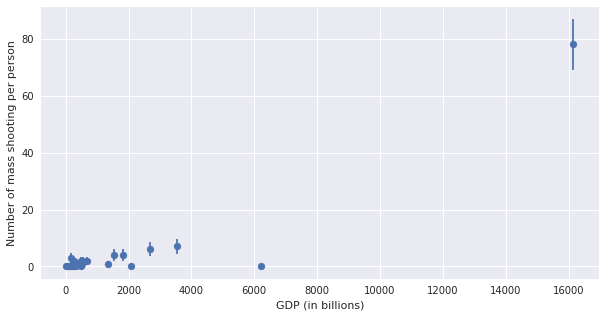

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings


In [10]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of mass shootings")


In [11]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


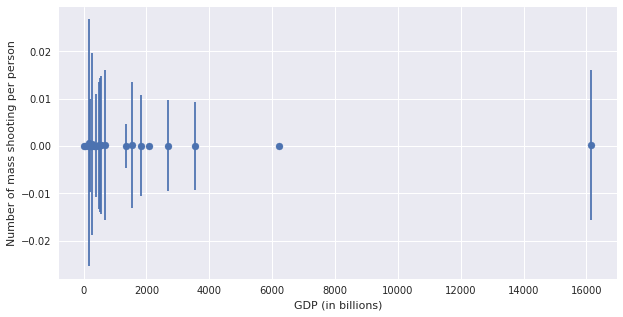

Number of mass shooting vs GDP, errors represent Poisson statistics.



In [12]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['shootingspp'])
ax.errorbar(df_.gdp / 1e9, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n")

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


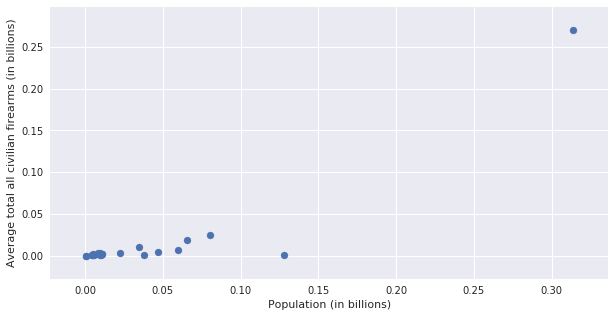

Average total all civilian firearms vs Population


In [13]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['pop']/1e9,df_['Average total all civilian firearms']/1e9)
ax.set_ylabel("Average total all civilian firearms (in billions)")
ax.set_xlabel("Population (in billions)")
ax.set_ylim()
pl.show()
print ("Average total all civilian firearms vs Population")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


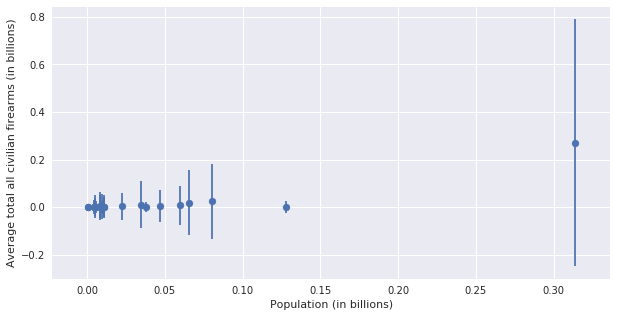

Average total all civilian firearms vs Population, errors represent Poisson statistics.



In [14]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['pop']/1e9,df_['Average total all civilian firearms']/1e9)
ax.errorbar(df_['pop']/1e9,df_['Average total all civilian firearms']/1e9, 
            yerr = np.sqrt(df_['Average total all civilian firearms']/1e9 * 1.0), fmt = '.')
ax.set_ylabel("Average total all civilian firearms (in billions)")
ax.set_xlabel("Population (in billions)")
ax.set_ylim()
pl.show()
print ("Average total all civilian firearms vs Population, " + 
       "errors represent Poisson statistics.\n")


## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [15]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');


NameError: name 'plt' is not defined

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


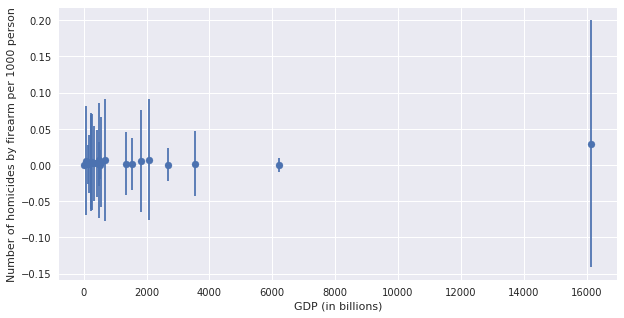

Number of homicides by firearm per 1000 person vs GDP, errors represent Poisson statistics.



In [16]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.errorbar(df_.gdp / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1000 * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicides by firearm per 1000 person")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm per 1000 person vs GDP, " + 
       "errors represent Poisson statistics.\n")


## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [17]:
df_['Color'] = 0
df_['Color'][df_["Country"]=="United States"] = 1
df_['Color2'] = 'b'
df_['Color2'][df_["Country"]=="United States"] = 'r'

colors = ["Blue","Red"]
cmap = matplotlib.colors.ListedColormap(colors)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


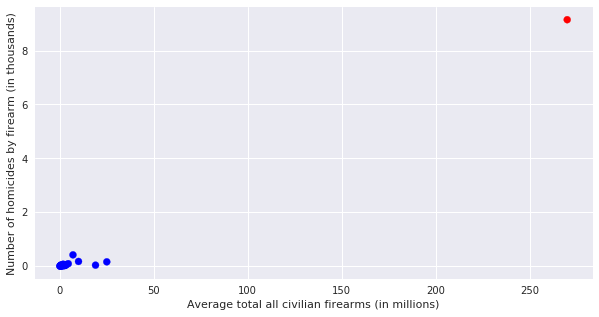

Number of homicides by firearm vs Average total all civilian firearms
Note: US is shown in red color



In [18]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e6, df_['Number of homicides by firearm']/1000,c=df_['Color'],cmap=cmap)
ax.set_xlabel("Average total all civilian firearms (in millions)")
ax.set_ylabel("Number of homicides by firearm (in thousands)")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs Average total all civilian firearms\n" + 
       "Note: US is shown in red color\n")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


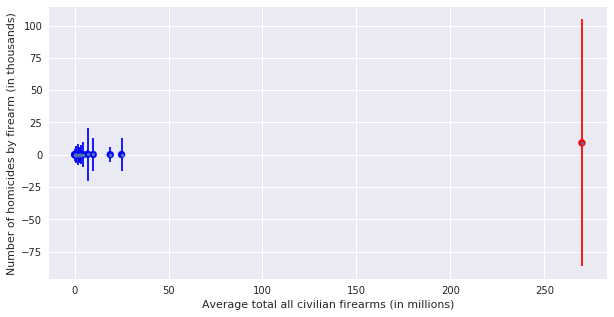

Number of homicides by firearm vs Average total all civilian firearms, errors represent Poisson statistics.
Note: US is shown in red color



In [19]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e6, df_['Number of homicides by firearm']/1000,c=df_['Color'],cmap=cmap)
ax.errorbar(df_['Average total all civilian firearms'] / 1e6, df_['Number of homicides by firearm']/1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0), fmt = '.', ecolor = df_['Color2'])
ax.set_xlabel("Average total all civilian firearms (in millions)")
ax.set_ylabel("Number of homicides by firearm (in thousands)")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" +
      "Note: US is shown in red color\n")


## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


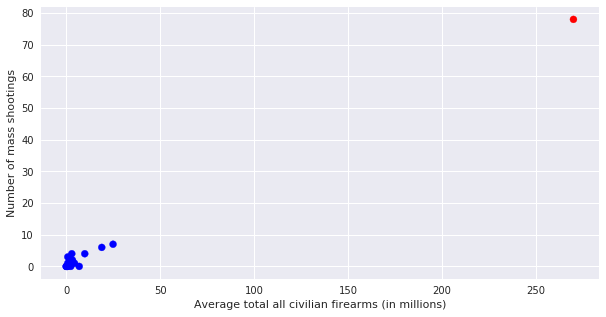

Number of mass shootings vs Average total all civilian firearms
Note: US is shown in red color



In [20]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e6, df_['Number of mass shootings'],c=df_['Color'],cmap=cmap)
ax.set_xlabel("Average total all civilian firearms (in millions)")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs Average total all civilian firearms\n" +
      "Note: US is shown in red color\n")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


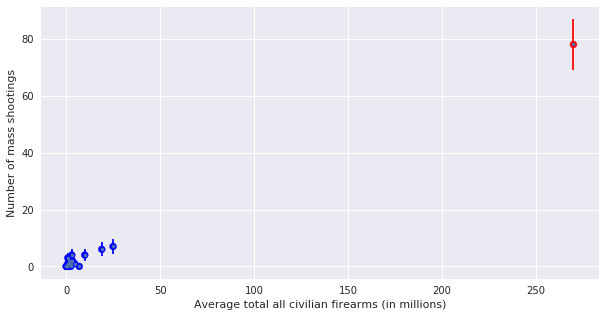

Number of mass shootings vs Average total all civilian firearms, errors represent Poisson statistics.
Note: US is shown in red color



In [21]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1e6, df_['Number of mass shootings'],c=df_['Color'],cmap=cmap)
ax.errorbar(df_['Average total all civilian firearms'] / 1e6, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', ecolor = df_['Color2'])
ax.set_xlabel("Average total all civilian firearms (in millions)")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" +
      "Note: US is shown in red color\n")


# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [22]:
df_["Average total all civilian firearmspp"] = df_["Average total all civilian firearms"] / df_['pop']
print(df_["Average total all civilian firearmspp"].mean())
print(df_["shootingspp"].mean())
df_['cf_unity'] = df_["Average total all civilian firearmspp"]
df_['s_unity'] = df_["shootingspp"] / 0.0001
df_.head()

0.226015952454
0.000123568888329


Country Name         pop           gdp      Country  Guns/100 inhabitants  \
0    Australia  22742475.0  1.543411e+12    Australia                  15.0   
1      Austria   8429991.0  4.094252e+11      Austria                  30.4   
2      Belgium  11128246.0  4.978842e+11      Belgium                  17.2   
3       Canada  34750545.0  1.824289e+12       Canada                  30.8   
4  Switzerland   7996861.0  6.680436e+11  Switzerland                  45.7   

   Number of mass shootings  Number of homicides by firearm  \
0                         4                            30.0   
1                         1                            18.0   
2                         2                            70.0   
3                         4                           173.0   
4                         2                            57.0   

   Average total all civilian firearms  shootingspp  Color Color2  \
0                            3050000.0     0.000176      0      b   
1                            2500000.0     0.000119      0      b   
2                            1800000.0     0.000180      0      b   
3                            9950000.0     0.000115      0      b   
4                            3400000.0     0.000250      0      b   

   Average total all civilian firearmspp  cf_unity   s_unity  
0                               0.134110  0.134110  1.758824  
1                               0.296560  0.296560  1.186241  
2                               0.161751  0.161751  1.797228  
3                               0.286326  0.286326  1.151061  
4                               0.425167  0.425167  2.500981

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


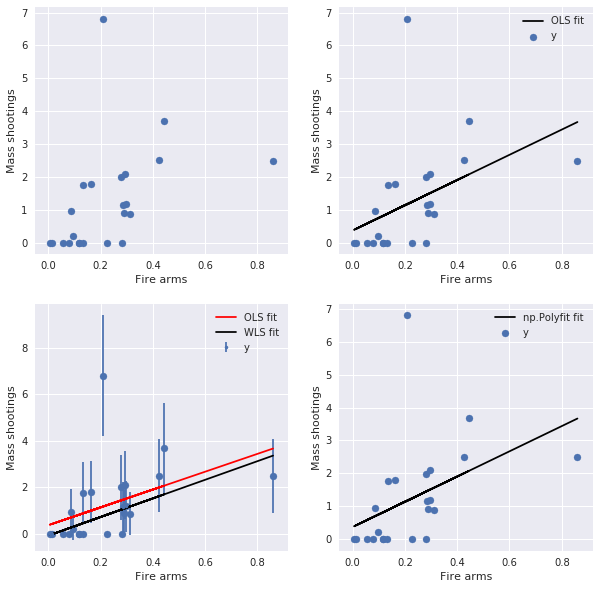

Fitting a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person using 3 different methods.


In [23]:
fig = pl.figure(figsize=(10,10)) 

ax = fig.add_subplot(221)
scatter = ax.scatter(df_['cf_unity'], df_['s_unity'])
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()

smresult = sm.OLS(df_['s_unity'], sm.add_constant(df_['cf_unity'])).fit()
beta0_sm, beta1_sm = smresult.params
ax = fig.add_subplot(222)
scatter = ax.scatter(df_['cf_unity'], df_['s_unity'],label="y")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
ax.plot(df_['cf_unity'], df_['cf_unity'] * beta1_sm + beta0_sm, 'k-',label="OLS fit")
ax.legend()

smresult = sm.OLS(df_['s_unity'], sm.add_constant(df_['cf_unity'])).fit()
beta0_sm, beta1_sm = smresult.params
ax = fig.add_subplot(223)
scatter = ax.scatter(df_['cf_unity'], df_['s_unity'],label=None)
ax.errorbar(df_['cf_unity'], df_['s_unity'], 
            yerr = np.sqrt(df_['s_unity']), fmt = '.',label="y")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
ax.plot(df_['cf_unity'], df_['cf_unity'] * beta1_sm + beta0_sm, 'r-',label="OLS fit")
weights = 1.0/np.sqrt(df_['s_unity'])
weights[weights>2] = 2
smresult2 = sm.WLS(df_['s_unity'], sm.add_constant(df_['cf_unity']),weights=weights).fit()
beta0_sm2, beta1_sm2 = smresult2.params
ax.plot(df_['cf_unity'], df_['cf_unity'] * beta1_sm2 + beta0_sm2, 'k-',label="WLS fit")
ax.legend()

beta1_np, beta0_np = np.polyfit(df_['cf_unity'], df_['s_unity'] ,1) 
ax = fig.add_subplot(224)
scatter = ax.scatter(df_['cf_unity'], df_['s_unity'],label="y")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
ax.plot(df_['cf_unity'], df_['cf_unity'] * beta1_np + beta0_np, 'k-',label="np.Polyfit fit")
ax.legend()
pl.show()

print("Fitting a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person using 3 different methods.")

<strong>Note: To overcome problem of inf weights I replaced inf with 2 since larger values of the weights removing inf were around 1.</strong>

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



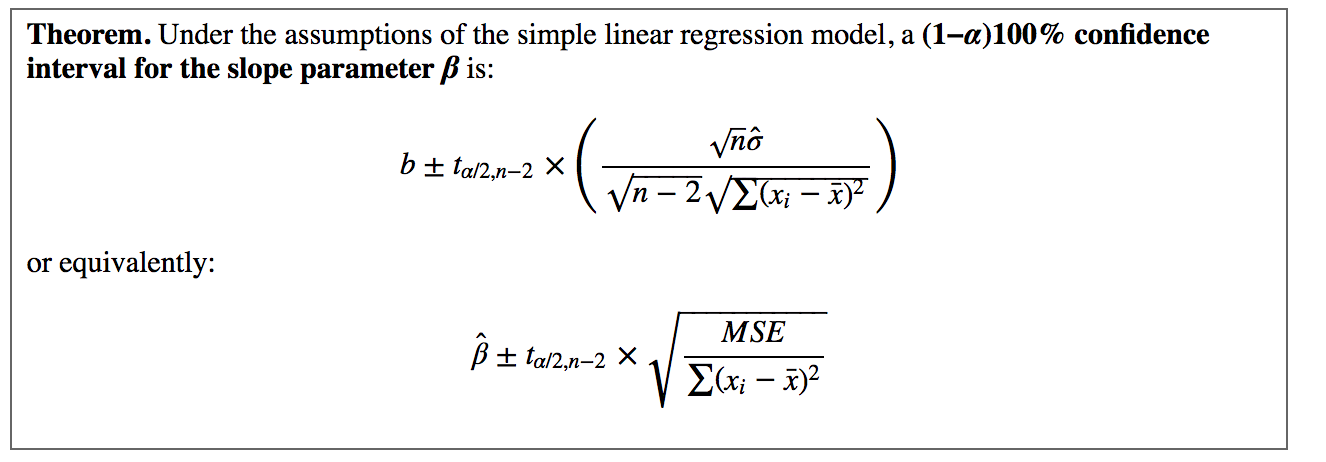

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


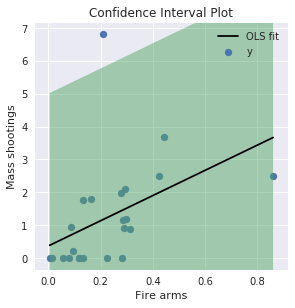

In [24]:
df_.sort_values(by='cf_unity',inplace=True)
n=df_.shape[0]
sigma=np.sqrt(np.sum((df_['s_unity'] - smresult.predict())**2)/n)
mul=(np.sqrt(n)*sigma)/(np.sqrt(n-2)*np.sqrt(np.sum((df_['cf_unity'] -df_['cf_unity'].mean())**2)))
from scipy.stats import t
tp = t.ppf(0.975, n-2)
ci=tp*mul
fig = pl.figure(figsize=(10,10)) 
smresult = sm.OLS(df_['s_unity'], sm.add_constant(df_['cf_unity'])).fit()
beta0_sm, beta1_sm = smresult.params
ax = fig.add_subplot(222)
scatter = ax.scatter(df_['cf_unity'], df_['s_unity'],label="y")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
ax.set_title('Confidence Interval Plot')
ax.plot(df_['cf_unity'], df_['cf_unity'] * beta1_sm + beta0_sm, 'k-',label="OLS fit")
ax.legend()
ax.fill_between(df_['cf_unity'], smresult.predict() - ci,smresult.predict() + beta0_sm + ci, alpha=0.5)
pl.show()

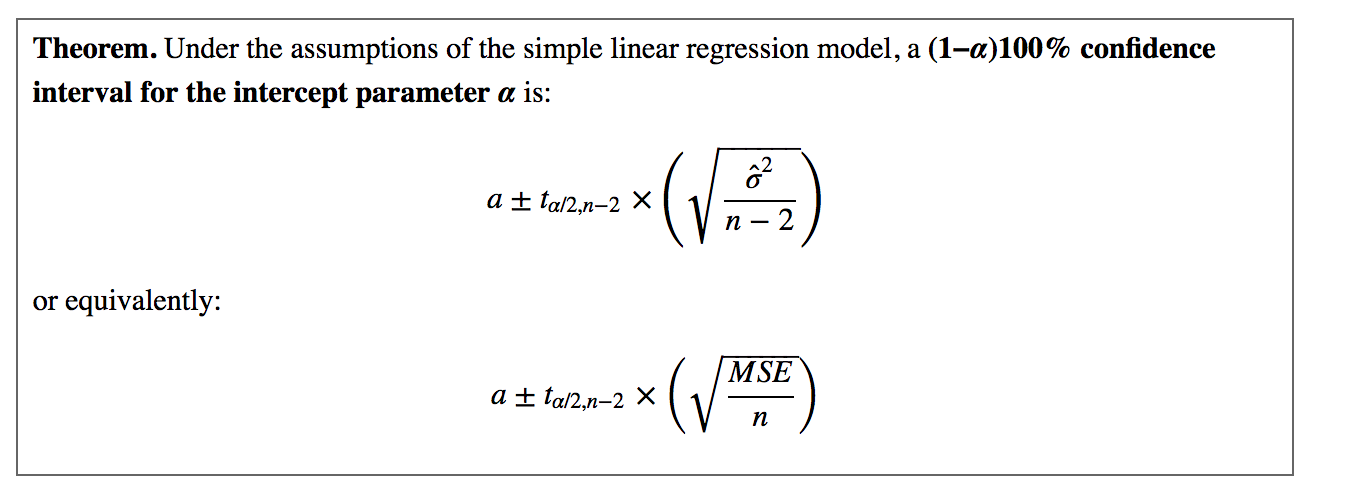

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


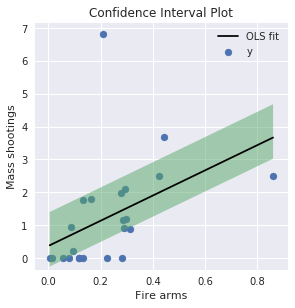

In [25]:
df_.sort_values(by='cf_unity',inplace=True)
n=df_.shape[0]
sigma=np.sqrt(np.sum((df_['s_unity'] - smresult.predict())**2)/n)
mul=np.sqrt((sigma**2)/(n-2))
from scipy.stats import t
tp = t.ppf(0.975, n-2)
ci=tp*mul
fig = pl.figure(figsize=(10,10)) 
smresult = sm.OLS(df_['s_unity'], sm.add_constant(df_['cf_unity'])).fit()
beta0_sm, beta1_sm = smresult.params
ax = fig.add_subplot(222)
scatter = ax.scatter(df_['cf_unity'], df_['s_unity'],label="y")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
ax.set_title('Confidence Interval Plot')
ax.plot(df_['cf_unity'], df_['cf_unity'] * beta1_sm + beta0_sm, 'k-',label="OLS fit")
ax.legend()
ax.fill_between(df_['cf_unity'], smresult.predict() - ci,smresult.predict() + beta0_sm + ci, alpha=0.5)
pl.show()

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

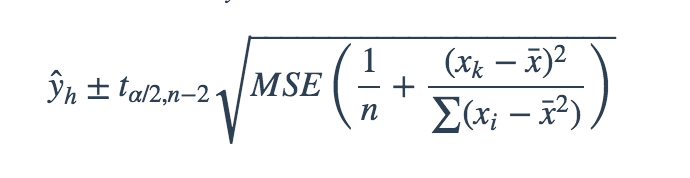

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


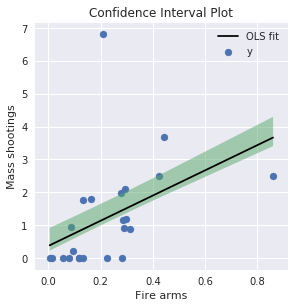

In [26]:
df_.sort_values(by='cf_unity',inplace=True)
n=df_.shape[0]
sy=np.sqrt(np.sum((df_['s_unity'] - smresult.predict())**2)/n-2)
mul=np.sqrt(sy*((1/n)+((df_['cf_unity'] - df_['cf_unity'].mean())**2/np.sum(df_['cf_unity'] - df_['cf_unity'].mean()**2))))
from scipy.stats import t
tp = t.ppf(0.975, n-2)
ci=tp*mul
fig = pl.figure(figsize=(10,10)) 
smresult = sm.OLS(df_['s_unity'], sm.add_constant(df_['cf_unity'])).fit()
beta0_sm, beta1_sm = smresult.params
ax = fig.add_subplot(222)
scatter = ax.scatter(df_['cf_unity'], df_['s_unity'],label="y")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
ax.plot(df_['cf_unity'], df_['cf_unity'] * beta1_sm + beta0_sm, 'k-',label="OLS fit")
ax.legend()
ax.set_title('Confidence Interval Plot')
ax.fill_between(df_['cf_unity'], smresult.predict() - ci,smresult.predict() + beta0_sm + ci, alpha=0.5)
pl.show()

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

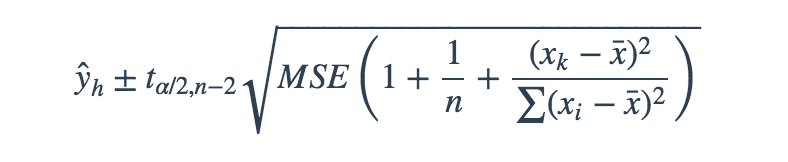

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


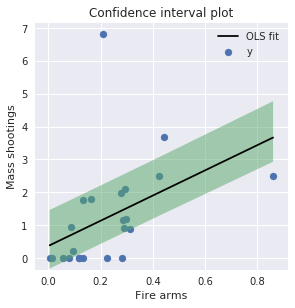

In [27]:
df_.sort_values(by='cf_unity',inplace=True)
n=df_.shape[0]
sy=np.sqrt(np.sum((df_['s_unity'] - smresult.predict())**2)/n-2)
mul=np.sqrt(sy*((1 + 1/n)+((df_['cf_unity'] - df_['cf_unity'].mean())**2/np.sum(df_['cf_unity'] - df_['cf_unity'].mean()**2))))
from scipy.stats import t
tp = t.ppf(0.975, n-2)
ci=tp*mul
fig = pl.figure(figsize=(10,10)) 
smresult = sm.OLS(df_['s_unity'], sm.add_constant(df_['cf_unity'])).fit()
beta0_sm, beta1_sm = smresult.params
ax = fig.add_subplot(222)
scatter = ax.scatter(df_['cf_unity'], df_['s_unity'],label="y")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
ax.plot(df_['cf_unity'], df_['cf_unity'] * beta1_sm + beta0_sm, 'k-',label="OLS fit")
ax.legend()
ax.set_title('Confidence interval plot')
ax.fill_between(df_['cf_unity'], smresult.predict() - ci,smresult.predict() + beta0_sm + ci, alpha=0.5)
pl.show()

Text(0.5,1,'Confidence interval plot using seaborn')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


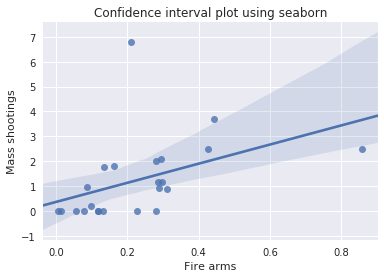

In [28]:
pl.figure()
import seaborn  as sns
sns.regplot(x='cf_unity', y='s_unity', data=df_);
pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");
pl.title('Confidence interval plot using seaborn')

 <strong>Confidence interval for the single y value</strong>

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


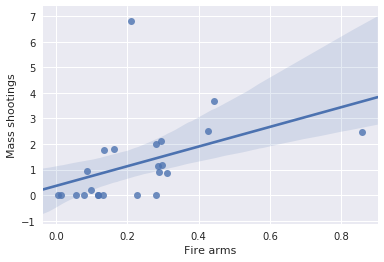

In [38]:
pl.figure()
import seaborn  as sns
sns.regplot(x="cf_unity", y="s_unity", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


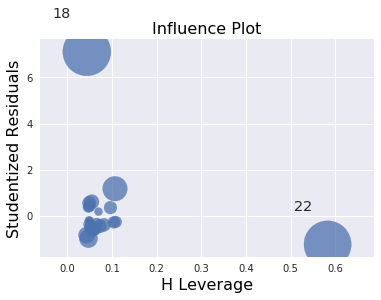

In [48]:
sm.graphics.influence_plot(smresult, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings

In [29]:
df_.iloc[18,:]

Country Name                                 Austria
pop                                      8.42999e+06
gdp                                      4.09425e+11
Country                                      Austria
Guns/100 inhabitants                            30.4
Number of mass shootings                           1
Number of homicides by firearm                    18
Average total all civilian firearms          2.5e+06
shootingspp                              0.000118624
Color                                              0
Color2                                             b
Average total all civilian firearmspp        0.29656
cf_unity                                     0.29656
s_unity                                      1.18624
Name: 1, dtype: object

In [30]:
df_.iloc[22,:]

Country Name                             United States
pop                                        3.13993e+08
gdp                                        1.61553e+13
Country                                  United States
Guns/100 inhabitants                              88.8
Number of mass shootings                            78
Number of homicides by firearm                    9146
Average total all civilian firearms            2.7e+08
shootingspp                                0.000248413
Color                                                1
Color2                                               r
Average total all civilian firearmspp         0.859891
cf_unity                                      0.859891
s_unity                                        2.48413
Name: 22, dtype: object